<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/mosaic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
target_image_path  = '/content/drive/My Drive/untitled.png'
image_library_folder = '/content/drive/My Drive/Teaching/AA/Landscape_pinterest/2/'

## Method 1: Basic Mosaic

In [ ]:
def resize_image(image, size):
    """Resize an image to the given size."""
    return image.resize(size)

def calculate_average_color(image):
    """Calculate the average color of the given image."""
    np_image = np.array(image)
    w, h, d = np_image.shape
    return np_image.reshape(w*h, d).mean(axis=0)

def apply_sharpen_filter(image):
    """Apply a sharpening filter to the image."""
    return image.filter(ImageFilter.SHARPEN)

def generate_unique_filename(base_path):
    """Generate a unique filename."""
    count = 1
    while True:
        path = f"{base_path}_{count}.png"
        if not os.path.exists(path):
            return path
        count += 1

def create_mosaic(target_image_path, image_library_folder, num_tiles_x, num_tiles_y, output_width=None, output_height=None, apply_sharpening=False):
    print("Loading target image...")
    target = Image.open(target_image_path).convert('RGB')

    # Adjusting the target image size to match the output resolution, if specified
    if output_width and output_height:
        target = target.resize((output_width, output_height))

    target_width, target_height = target.size

    # Setting tile width and height to 32 pixels
    tile_width = tile_height = 32

    print("Loading images from the library...")
    image_files = os.listdir(image_library_folder)
    images = [Image.open(os.path.join(image_library_folder, img)).convert('RGB')
              for img in image_files if img.endswith(('png', 'jpg', 'jpeg'))]
    print(f"Loaded {len(images)} images.")

    print("Processing target image...")
    target_width = num_tiles_x * tile_width
    target_height = num_tiles_y * tile_height
    target = target.resize((target_width, target_height))

    print("Resizing images in the library...")
    tile_size = (tile_width, tile_height)
    if apply_sharpening:
        images_resized = [apply_sharpen_filter(resize_image(img, tile_size)) for img in images]
    else:
        images_resized = [resize_image(img, tile_size) for img in images]
    average_colors = [calculate_average_color(img) for img in images_resized]

    print("Creating mosaic...")
    mosaic = Image.new('RGB', target.size)
    used_images = []

    for i in range(0, target_width, tile_width):
        for j in range(0, target_height, tile_height):
            target_tile = target.crop((i, j, i + tile_width, j + tile_height))
            target_color = calculate_average_color(target_tile)
            distances = [np.linalg.norm(target_color - color) for color in average_colors]
            closest_img_index = np.argmin(distances)
            closest_img = images_resized[closest_img_index]
            mosaic.paste(closest_img, (i, j))
            filename = image_files[closest_img_index]
            used_images.append(filename)
        print(f"Row {j // tile_height + 1} of {target_height // tile_height} complete.")

    if output_width and output_height:
        mosaic = mosaic.resize((output_width, output_height))

    base_output_path = '/content/drive/My Drive/mosaic'  # Change to your desired path
    output_path = generate_unique_filename(base_output_path)
    mosaic.save(output_path)
    print(f"Mosaic created successfully. Saved to {output_path}")

    # Visualization
    plt.imshow(mosaic)
    plt.axis('off')
    plt.show()

    return used_images


Loading target image...
Loading images from the library...
Loaded 2362 images.
Processing target image...
Resizing images in the library...
Creating mosaic...
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 

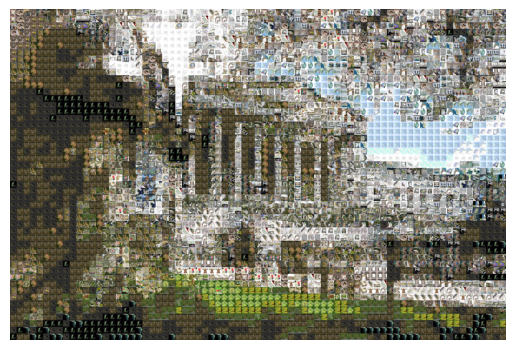

Used tile filenames: ['0ecab962a5dc2b6a2fd763ea70c33596.jpg', '0ecab962a5dc2b6a2fd763ea70c33596.jpg', 'ff717595b481baf27007d3a492fc2ceb.jpg', 'efdedddde8aef517605066ef58086320.png', 'dd2299586ca3abf9e79c48f40a1e7f18.jpg', 'dd2299586ca3abf9e79c48f40a1e7f18.jpg', 'dfc85baa0ace42f56fbf233f91a37516.jpg', 'dfc85baa0ace42f56fbf233f91a37516.jpg', 'c4e3d584fb246f74f0291bf3160e014c.jpg', '7ccbe82a5982dda5396634fe0253ecd2.jpg', '7ccbe82a5982dda5396634fe0253ecd2.jpg', 'f64730276b49572198ace1b06751ed53.png', 'f64730276b49572198ace1b06751ed53.png', 'd66bac18c2e9ba727034c23bf300d031.jpg', 'f64730276b49572198ace1b06751ed53.png', 'f64730276b49572198ace1b06751ed53.png', 'd66bac18c2e9ba727034c23bf300d031.jpg', 'd66bac18c2e9ba727034c23bf300d031.jpg', 'f64730276b49572198ace1b06751ed53.png', 'f64730276b49572198ace1b06751ed53.png', 'd66bac18c2e9ba727034c23bf300d031.jpg', 'd66bac18c2e9ba727034c23bf300d031.jpg', 'd66bac18c2e9ba727034c23bf300d031.jpg', 'd66bac18c2e9ba727034c23bf300d031.jpg', 'd66bac18c2e9ba727

In [ ]:
#used_tile_filenames = create_mosaic(target_image_path, image_library_folder, tile_height=10, tile_width=10, scale_factor=4, apply_sharpening=sharpening)

used_tile_filenames = create_mosaic(target_image_path, image_library_folder, num_tiles_x=75, num_tiles_y=50, output_width=None, output_height=None, apply_sharpening=False)
print("Used tile filenames:", used_tile_filenames)

## Method 2: To avoid repetitions and maximize the diversity of images in the mosaic

In [38]:

def resize_image(image, size):
    """Resize an image to the given size."""
    return image.resize(size)

def calculate_average_color(image):
    """Calculate the average color of the given image."""
    np_image = np.array(image)
    w, h, d = np_image.shape
    return np_image.reshape(w*h, d).mean(axis=0)

def apply_sharpen_filter(image):
    """Apply a sharpening filter to the image."""
    return image.filter(ImageFilter.SHARPEN)

def generate_unique_filename(base_path):
    """Generate a unique filename."""
    count = 1
    while True:
        path = f"{base_path}_{count}.png"
        if not os.path.exists(path):
            return path
        count += 1

def create_mosaic(target_image_path, image_library_folder, num_tiles_x, num_tiles_y, output_width=None, output_height=None, apply_sharpening=False, mosaic_size_inches=(20, 20), dpi=150):
    print("Loading target image...")
    target = Image.open(target_image_path).convert('RGB')

    if output_width and output_height:
        target = target.resize((output_width, output_height))

    target_width, target_height = target.size
    tile_width = tile_height = 32

    print("Loading images from the library...")
    image_files = os.listdir(image_library_folder)
    images = [Image.open(os.path.join(image_library_folder, img)).convert('RGB') for img in image_files if img.endswith(('png', 'jpg', 'jpeg'))]
    print(f"Loaded {len(images)} images.")

    image_usage = {img: 0 for img in image_files}

    print("Processing target image...")
    target_width = num_tiles_x * tile_width
    target_height = num_tiles_y * tile_height
    target = target.resize((target_width, target_height))

    print("Resizing images in the library...")
    tile_size = (tile_width, tile_height)
    if apply_sharpening:
        images_resized = [apply_sharpen_filter(resize_image(img, tile_size)) for img in images]
    else:
        images_resized = [resize_image(img, tile_size) for img in images]
    average_colors = [calculate_average_color(img) for img in images_resized]

    print("Creating mosaic...")
    mosaic = Image.new('RGB', target.size)

    for i in range(0, target_width, tile_width):
        for j in range(0, target_height, tile_height):
            target_tile = target.crop((i, j, i + tile_width, j + tile_height))
            target_color = calculate_average_color(target_tile)
            distances = [np.linalg.norm(target_color - color) for color in average_colors]
            sorted_indices = sorted(range(len(distances)), key=lambda k: (distances[k], image_usage[image_files[k]]))
            closest_img_index = sorted_indices[0]
            closest_img = images_resized[closest_img_index]
            image_usage[image_files[closest_img_index]] += 1
            mosaic.paste(closest_img, (i, j))

        print(f"Row {j // tile_height + 1} of {target_height // tile_height} complete.")

    base_output_path = '/content/drive/My Drive/mosaic'  # Replace with your desired path
    output_path = generate_unique_filename(base_output_path)

    # Resize the mosaic to the desired size in inches and set DPI
    mosaic_in_pixels = mosaic.resize((mosaic_size_inches[0]*dpi, mosaic_size_inches[1]*dpi))
    mosaic_in_pixels.save(output_path, 'PNG', dpi=(dpi, dpi))
    print(f"Mosaic created successfully. Saved to {output_path}")

    plt.imshow(mosaic_in_pixels)
    plt.axis('off')
    plt.gcf().set_size_inches(*mosaic_size_inches)
    plt.show()

    return image_usage


Loading target image...
Loading images from the library...
Loaded 2362 images.
Processing target image...
Resizing images in the library...
Creating mosaic...
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 complete.
Row 50 of 50 

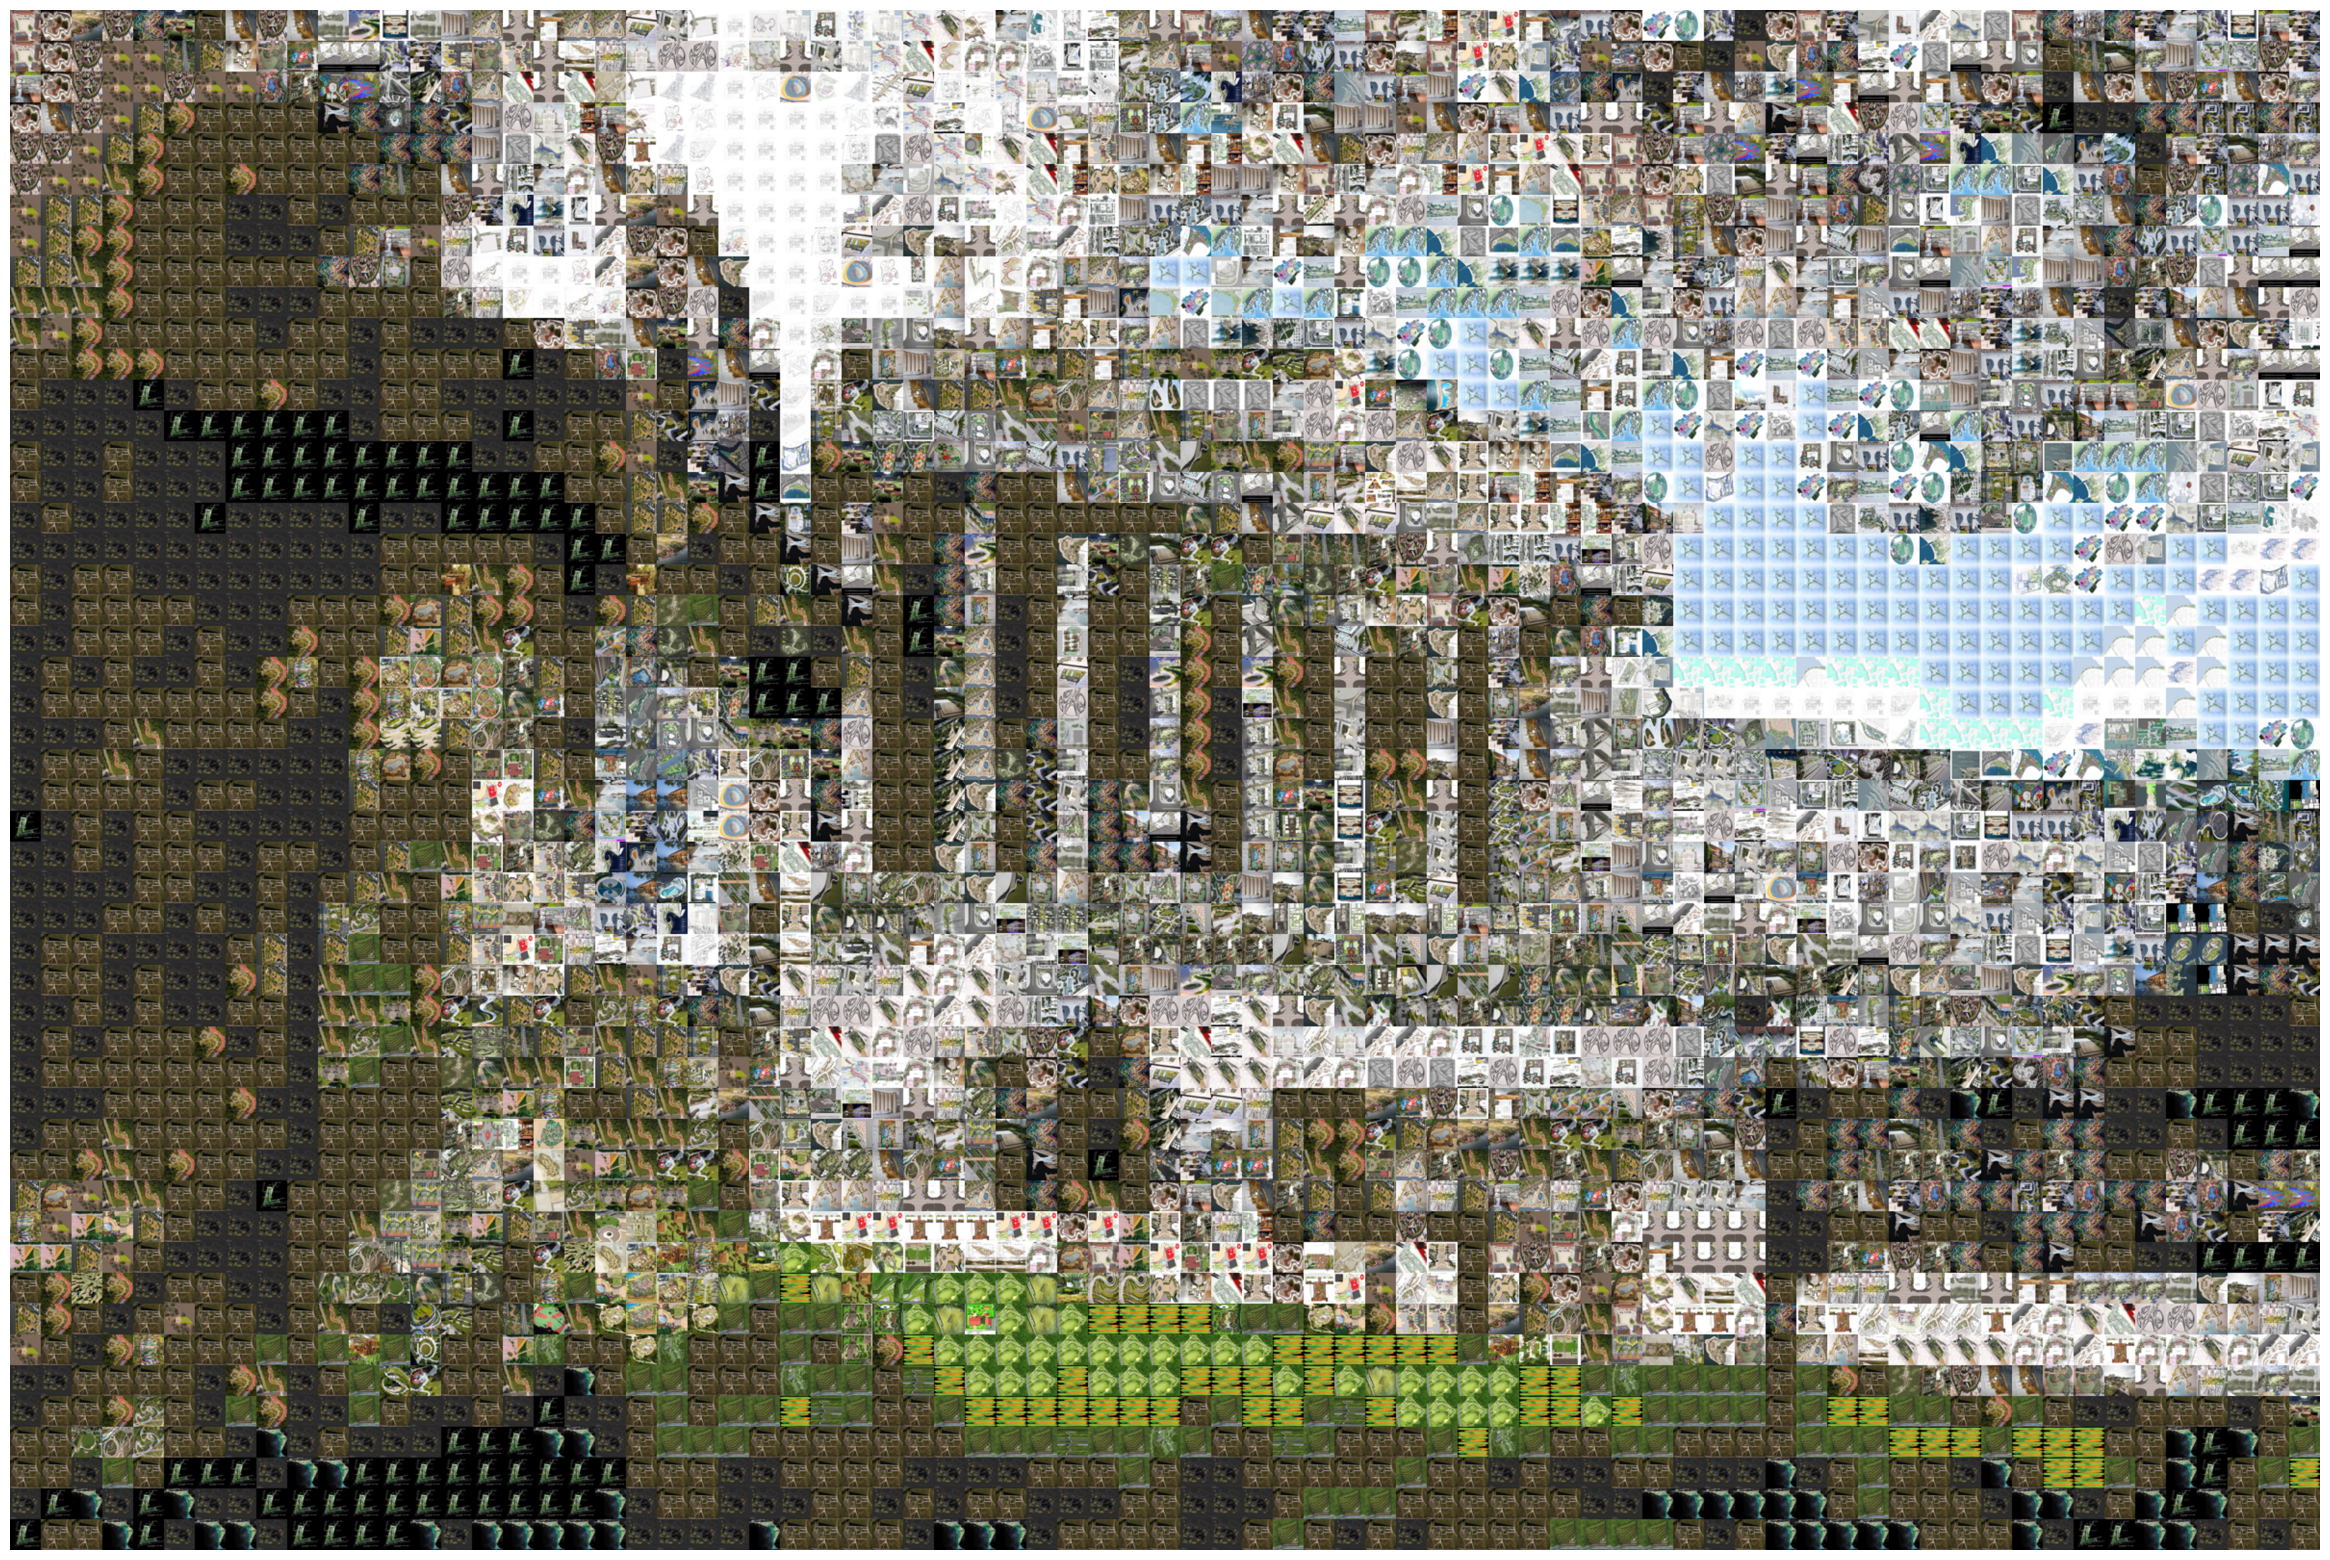

Used tile filenames: {'8f1785129bd9e88c3363adf3be9c8f8d.jpg': 0, '701360f6b9b6ca0ebec2498dc1dc6175.jpg': 0, '30901c292ded7d49c749aac5e8b2f206.jpg': 9, '5719a3e613988f38d511aef8deb33b4d.jpg': 14, '62559bd69ac28fcf08f54ed569babf75.jpg': 0, '743de4637707e97eb2539682fc06f7aa.jpg': 0, '9dfd8be2f05a9045df7830597a984de6.jpg': 0, '2829761f2dab0eb99e902956f41cb2b9.png': 0, '2b555c65381b0261340a9fc3b772db01.png': 0, '8983e4a12c37cab91e70b5e637da5c3c.jpg': 0, '29166db57baf399a93ea734e3dea0298.jpg': 0, 'a396d398466f07caf99beb8520f9ae17.jpg': 0, '15380853d52838a4a1f88dd3100066f3.jpg': 0, 'ae7af8b484616b9b81e38cf887405df5.jpg': 0, '894015a96377b82b0cf24789a6e7d58a.jpg': 0, '86cdd54eafec6c03edb1123281ae8bb8.jpg': 0, '22e9b1d83c01082fe27aec7a1b470444.jpg': 0, 'e8499b66895a4dd8297bcb3f15da3298.jpg': 8, '64a0f35258a4fede9b2e48fa65dc3a5f.jpg': 0, '19463e821345fe7cb9a8253ff9141470.jpg': 30, '38453196e28eea0ff3bc818ed9dc352e.jpg': 0, '74ea29a5fa88226fe0e95628c093fd5c.jpg': 0, 'cd19bf05d6980065c4dba1d831104

In [41]:
used_tile_filenames = create_mosaic(target_image_path, image_library_folder, num_tiles_x=75, num_tiles_y=50, mosaic_size_inches=(30, 20), dpi=150, output_width=None, output_height=None, apply_sharpening=False)
print("Used tile filenames:", used_tile_filenames)